# Домашнее задание 4

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 3 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_4

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \triangle_d} f(x) = \frac{1}{2}x^T A x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица (уже умеем генерировать) с $L =1000$, $\mu = 1$, а $\triangle_d$ - вероятностный симплекс:
$$
\triangle_d = \{x ~|~ x_i \geq 0, \sum_{i=1}^d x_i = 1\}.
$$

__(а)__ Для такой задачи напишите итерацию зеркального спуска с дивергенцией Брегмана, порожденной энтропийной функцией. Найдите выражение для итерации метода в явном виде (без подсчетов $\arg\min$).

Шаг имеет вид $x^{k+1} = \arg\min \limits_{x\in\Delta_d} [<\frac{1}{2}\gamma(A + A^T)x^k; x> + \sum\limits_{i = 1}^d x_i\ln(\frac{x_i}{x_i^k})]$ Отсюда $x^{k+1} = \arg\min \limits_{x\in\Delta_d}[\sum\limits_{i = 1}^d(\frac{1}{2}\gamma<((A + A^T)x^k)_i, x_i> + x_i\ln(\frac{x_i}{x_i^k}))]$
$\nabla_i f(x) = \frac{1}{2}\gamma ((A + A^T)x^k)_i + 1 + \ln(\frac{x_i}{x_i^k}) = 0$

$x_i$ имеет вид $x_i = \frac{x_i^k\exp(-(\frac{1}{2}\gamma((A + A^T)x^k)_i + 1))}{\sum\limits_{i = 1}^d x_i^k\exp(-(\frac{1}{2}\gamma((A + A^T)x^k)_i + 1))}$

__(б)__ Реализуйте метод зеркального спуска из пункта (а). Постройте для него график сходимости по времени и по итерациям. В качестве критерия сходимости используйте:
$$
\text{gap}(x^k) = \max_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle,
$$
или усредненную версию $\frac{1}{k} \sum_{i=1}^k \text{gap}(x^i)$. Найдите выражение в явном виде для подсчета $\text{gap}(x^k)$.

$\text{gap}(x^k) = \max\limits_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle = \langle Ax^k, x^k \rangle - \min\limits_{y \in \triangle_d} \langle Ax^k, y \rangle$
$\min\limits_{y \in \triangle_d} \langle Ax^k, y \rangle = \min\limits_{y \in \triangle_d}\sum\limits_{i = 1}^n (Ax^k)_iy_i. $

Минимизируем последнюю сумму. Для этого необходимо взять $\min\limits_{i\in [1,n]}{Ax^k}$ и направить вдоль наименьшей координаты.

In [1]:
import numpy as np
import numpy.linalg as la
import sympy
import scipy
import math
import time
import matplotlib.pyplot as plt



In [2]:
def generate_matrix(d, m, L):
    D = (L-m)*np.random.random_sample(d) + m
    #print(D)
    D[0] = d
    D[1] = m
    D = np.diag(D)
    S = scipy.stats.ortho_group.rvs(d) 
    #print(S)
    return S@D@S.T

d = 100
m = 1
L = 2000

A = generate_matrix(d, m, L)
#print(A)

In [3]:
def step(A, learning_rate, x):
    S = 0
    for i in range (d):
        S = S + x[i]*np.exp(-learning_rate*(A.dot(x))[i] - 1)
    x_final = np.array([])
    for i in range (d):
        x_final = np.append(x_final, x[i]*np.exp(-learning_rate*(A.dot(x))[i] - 1)/S)
    return x_final

def mirror_descent(A, x0, learning_rate, N):
    x = x0
    x = x.reshape(1, d)
    T = [0]
    time_0 = time.time()
    for i in range (N-1):
        x_k = step(A, learning_rate, x[i])
        x = np.vstack([x, x_k])
        T.append(time.time()-time_0)
    return x, T


def gap(A, x):
    y = np.zeros(d)
    y[np.nanargmin(A.dot(x))] = 1
    return A.dot(x).dot(x - y)

N=5000
x1, time1 = mirror_descent(A, np.ones(d)*1/100, 1/L, N)
print(gap(A, x1[N-1]))

0.04452143492298877


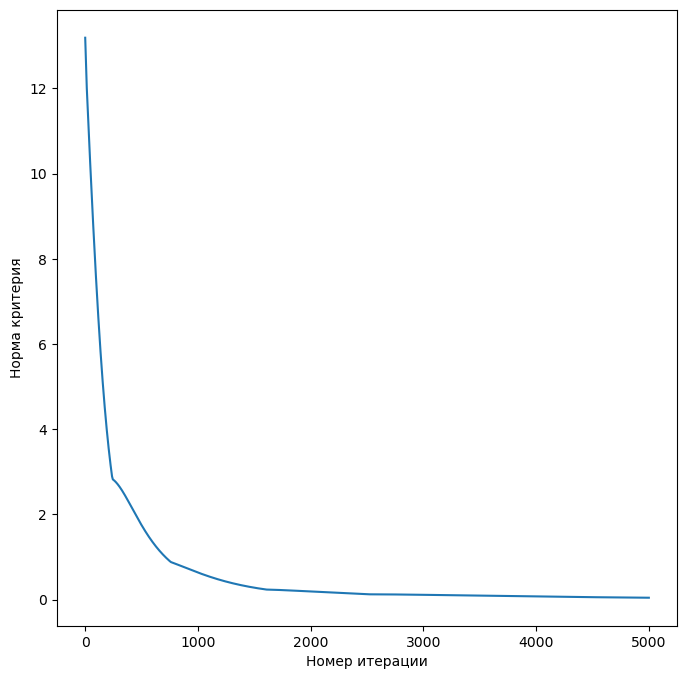

In [4]:
X_gr = np.array(range(N))
Y_gr = []
for i in x1: Y_gr.append(gap(A, i))

plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(X_gr, Y_gr)
plt.xlabel('Номер итерации'), plt.ylabel('Норма критерия')
plt.show()

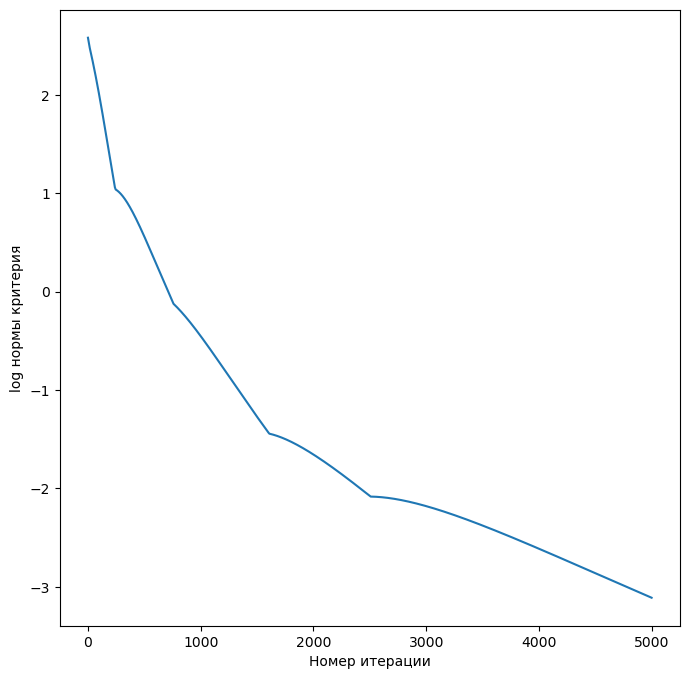

In [5]:
plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(X_gr, np.log(Y_gr))
plt.xlabel('Номер итерации'), plt.ylabel('log нормы критерия')
plt.show()

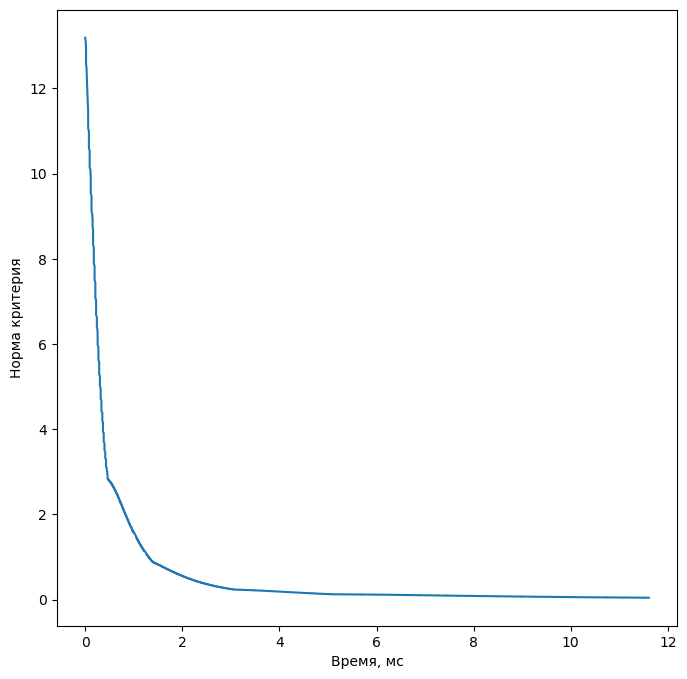

In [6]:
X_gr = time1
plt.figure(figsize=(8, 8))
plt.plot(X_gr, Y_gr)
plt.xlabel('Время, мс'), plt.ylabel('Норма критерия')
plt.show()

Y_gr1=Y_gr

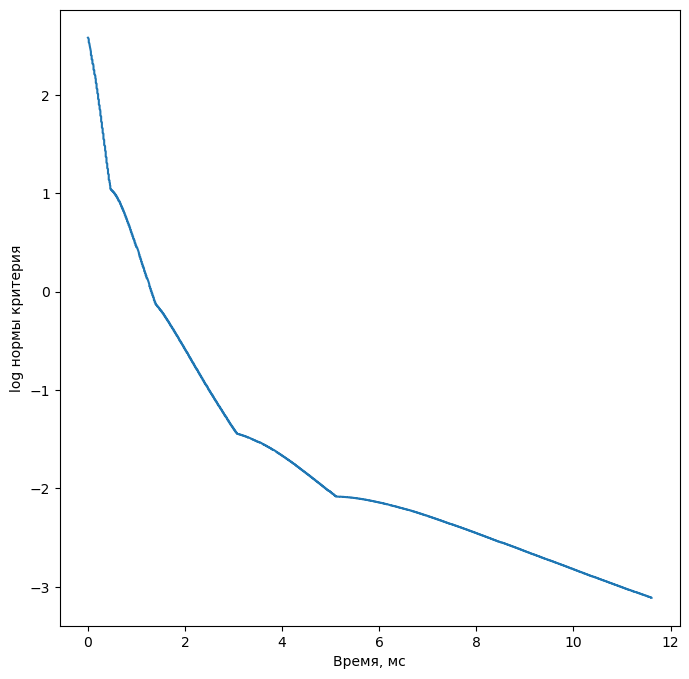

In [7]:
plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(time1, np.log(Y_gr))
plt.xlabel('Время, мс'), plt.ylabel('log нормы критерия')
plt.show()

__(в)__ Для этой же задачи напишите итерацию метода Франка-Вульфа. Реализуйте этот метод. Постройте для него график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска. Сделайте вывод.

In [8]:
N=1000


def Frank_Wolfe(A, x0, N):
    x = x0
    x = x.reshape(1, d)
    begin_time = time.time()
    T = [0]
    for i in range (N-1):
        s = np.zeros(d)
        s[np.argmin(A.dot(x[i]))] = 1
        x = np.vstack([x, x[i] + (2/(i+2))*(s - x[i])])
        T.append(time.time() - begin_time)
    return x, T

x2, time2 = Frank_Wolfe(A, np.ones(d)*1/100, N)
print(gap(A, x2[N-1]))

0.9167597363242799


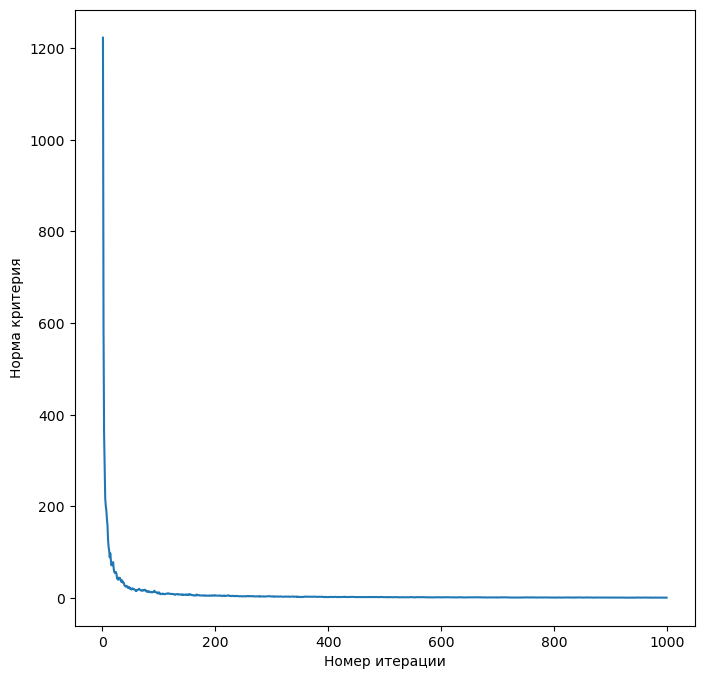

In [9]:
X_gr = np.array(range(N))
Y_gr = []
for i in x2: Y_gr.append(gap(A, i))

plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(X_gr[1:], Y_gr[1:])
plt.xlabel('Номер итерации'), plt.ylabel('Норма критерия')
plt.show()

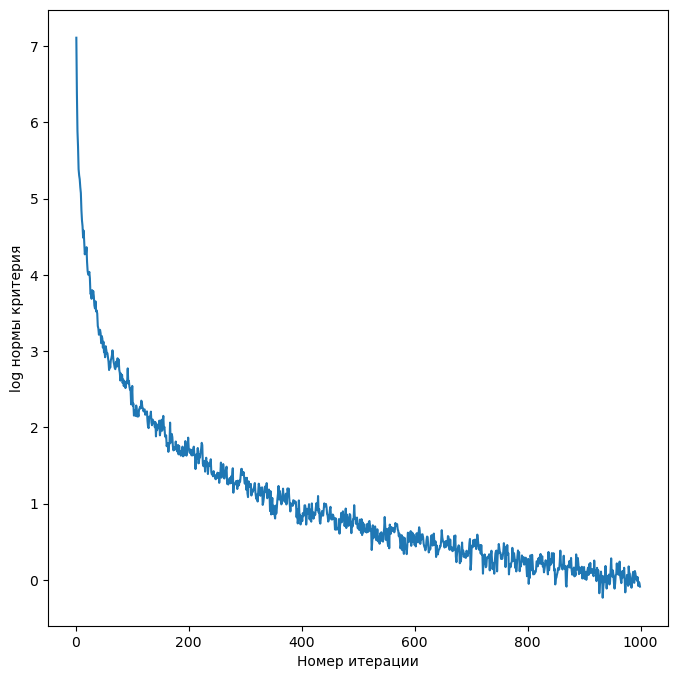

In [10]:
plt.figure(figsize=(8, 8))
X_gr=range(N)
plt.plot(X_gr[1:], np.log(Y_gr[1:]))
plt.xlabel('Номер итерации'), plt.ylabel('log нормы критерия')
plt.show()

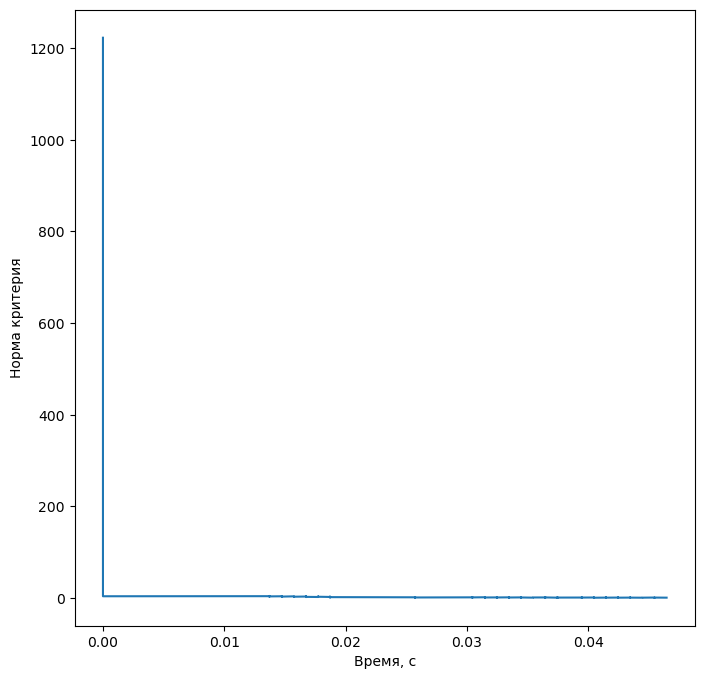

In [11]:
X_gr = time2

plt.figure(figsize=(8, 8))
plt.plot(X_gr[1:], Y_gr[1:])
plt.xlabel('Время, с'), plt.ylabel('Норма критерия')
plt.show()

Y_gr2 = Y_gr

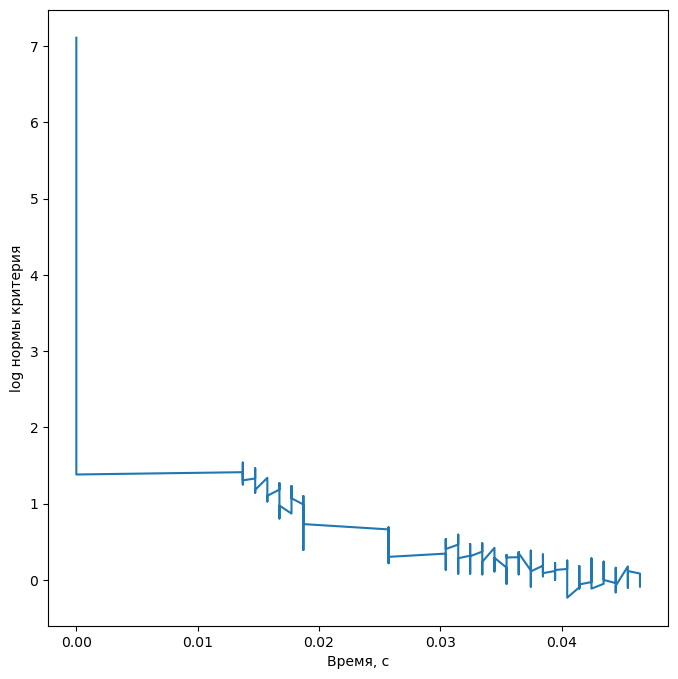

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(X_gr[1:], np.log(Y_gr[1:]))
plt.xlabel('Время, с'), plt.ylabel('log нормы критерия')
plt.show()

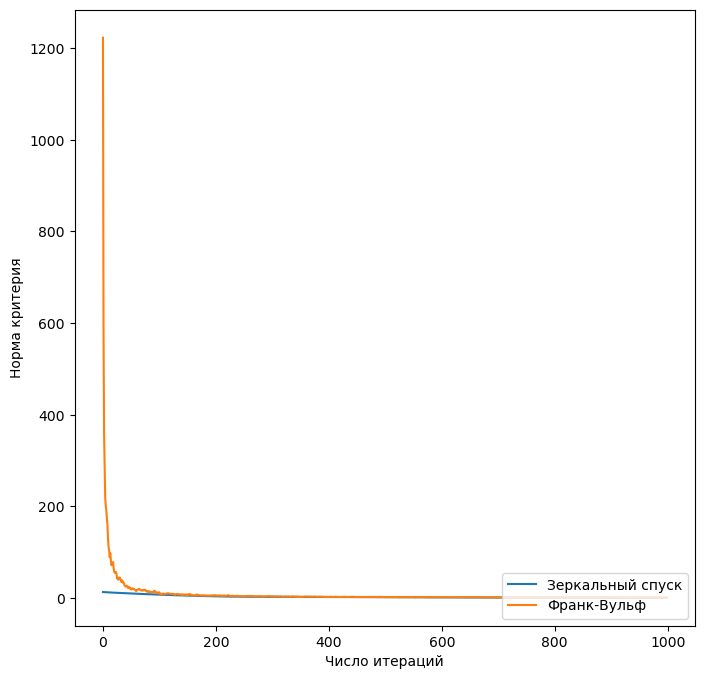

In [13]:
plt.figure(figsize=(8, 8))

plt.plot(range(N-1), Y_gr1[1:N], label = "Зеркальный спуск")
plt.plot(range(N-1), Y_gr2[1:N], label = "Франк-Вульф")

plt.legend(loc='lower right')
plt.xlabel('Число итераций'), plt.ylabel('Норма критерия')
plt.show()

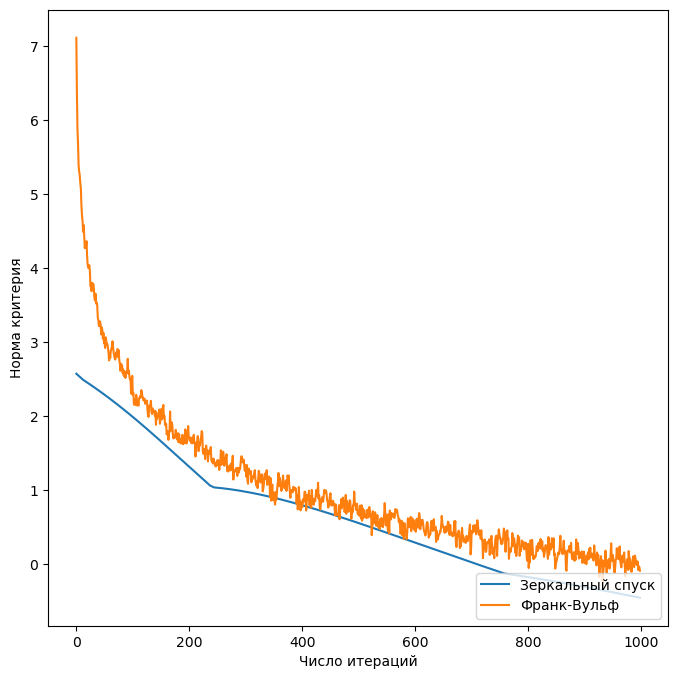

In [14]:
plt.figure(figsize=(8, 8))

plt.plot(range(N-1), np.log(Y_gr1[1:N]), label = "Зеркальный спуск")
plt.plot(range(N-1), np.log(Y_gr2[1:N]), label = "Франк-Вульф")

plt.legend(loc='lower right')
plt.xlabel('Число итераций'), plt.ylabel('Норма критерия')
plt.show()

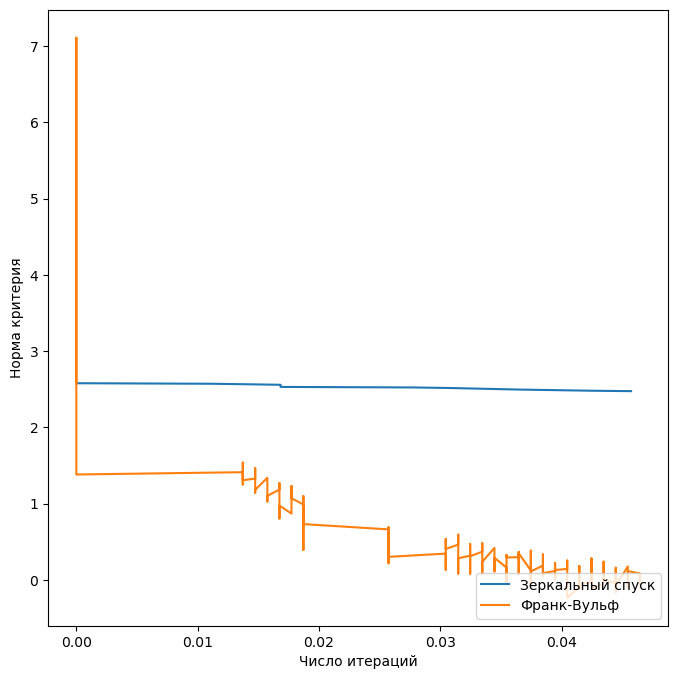

In [32]:
plt.figure(figsize=(8, 8))
max_time = time2[N-1]
min_time = time2[0]
N1=0
while(time1[N1]<max_time): 
    N1=N1+1

plt.plot(time1[:N1], np.log(Y_gr1[:N1]), label = "Зеркальный спуск")
plt.plot(time2[:N], np.log(Y_gr2[:N]), label = "Франк-Вульф")

plt.legend(loc='lower right')
plt.xlabel('Число итераций'), plt.ylabel('Норма критерия')
plt.show()

По графику и по итоговому значению Gap можно заметить, что зарекльный спук лучше. 

По времени Франк-Вульф лучше

__Бонусные пункты__

__(г)__ Реализуйте метод градиентного спуска для нашей задачи. Для этого найдите в Интернете алгоритм евклидовой проекции на вероятностный симплекс. Постройте для градиентного спуска с евклидовой проекцией график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска и метода Франка-Вульфа. Сделайте вывод.

In [16]:
#ответ

__(д)__ В [работе](https://sci-hub.ru/https://doi.org/10.1137/140992382) представлена ускоренная версия метода Франка-Вульфа (Алгоритм 2 для сильно выпуклой задачи). Он лучше с точки зрения теоретической сходимости по числу вызовов градиента. Реализуйте Алгоритм 2 для нашей задачи. Постройте график сходимости по времени и по количеству подсчетов $\nabla f$ (для предыдущих методов это было эквивалетно итерациям). Добавьте эти графики к графикам для остальных методов которые были получены выше. Сделайте вывод.

In [17]:
#ответ